In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data into a dataframe
URL = "https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO"
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1aWQsq0fdL3SF-jyrVMpEAtHW9FFSF2xO")

In [3]:
#display information about the dataframe and its first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99367 entries, 0 to 99366
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Year                        99367 non-null  int64 
 1   County of Program Location  99367 non-null  object
 2   Program Category            99367 non-null  object
 3   Service Type                99367 non-null  object
 4   Age Group                   99367 non-null  object
 5   Primary Substance Group     99366 non-null  object
 6   Admissions                  99367 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2007,Albany,Crisis,Medical Managed Detoxification,Under 18,Heroin,4
1,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,All Others,2
2,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Other Opioids,6
3,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Heroin,132
4,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Alcohol,35


In [597]:
#convert the object types into string types
df = df.convert_dtypes()

In [598]:
#impute the nan value in 'Primary Substance Group' with the column mode
df['Primary Substance Group'].fillna(df['Primary Substance Group'].mode()[0], inplace=True)

In [599]:
#check for any null values
df.isna().sum()

Year                          0
County of Program Location    0
Program Category              0
Service Type                  0
Age Group                     0
Primary Substance Group       0
Admissions                    0
dtype: int64

In [600]:
#remove any rows with negative values in the 'Admissions' column
df = df[df['Admissions'] >= 0]

Text(0, 0.5, '# of entries')

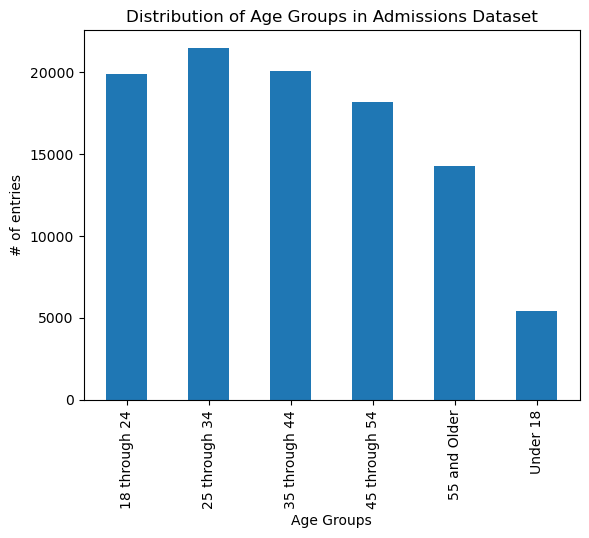

In [602]:
#get counts for 'Age Groups' column and plot distribution
ag_counts = df['Age Group'].value_counts(sort=False).sort_index()
plt.bar(ag_counts.index, ag_counts.values, width=0.5)
plt.xticks(rotation=90)
plt.title("Distribution of Age Groups in Admissions Dataset")
plt.xlabel("Age Groups")
plt.ylabel("# of entries")

Above chart shows the dirstibution of age groups in the dataset. The 18-24, 25-34, and 35-44 demographics have roughly the same number of entries, with there being a slight fall-off for 45-54, an approximate 25% fall-off for 55+, and an approximate 75% fall-off for under 18.

Text(0, 0.5, '# of entries')

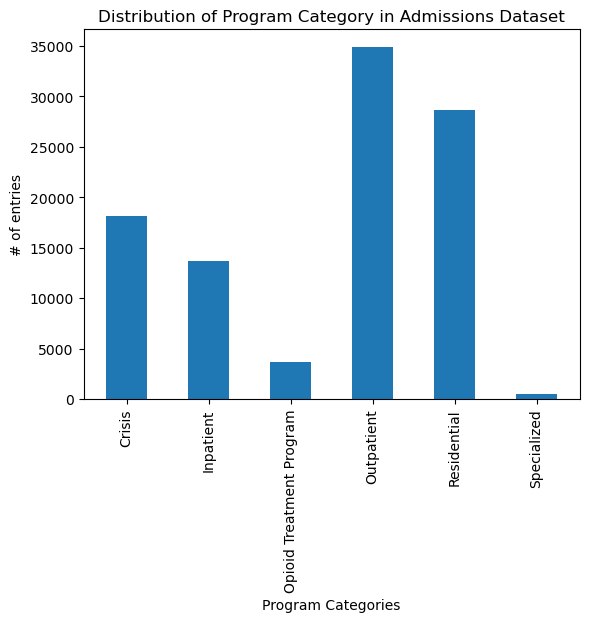

In [604]:
#get counts for 'Program Category' column and plot distribution
ag_counts = df['Program Category'].value_counts(sort=False).sort_index()
plt.bar(ag_counts.index, ag_counts.values, width=0.5)
plt.xticks(rotation=90)
plt.title("Distribution of Program Category in Admissions Dataset")
plt.xlabel("Program Categories")
plt.ylabel("# of entries")

Above chart shows the distribution of program categories in the dataset. The outpatient and residential programs are the msot common, with crisis and inpatient programs having about half as many entries respectively, and opioid treatment and specialized programs having less than 5000 entries.

Text(0, 0.5, '# of entries')

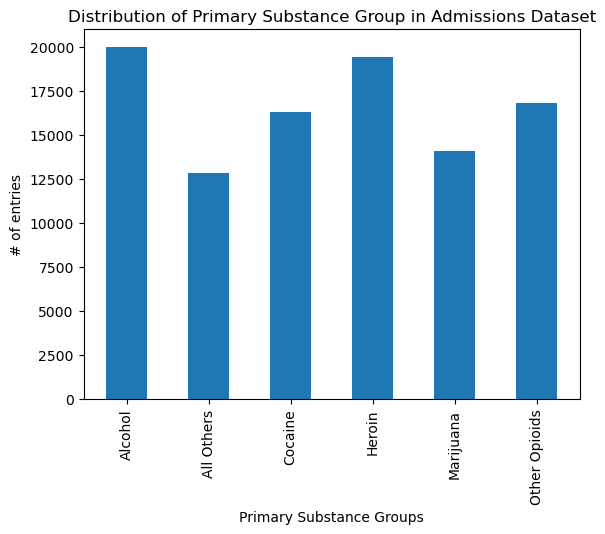

In [606]:
#get counts for 'Primary Substance Group' column and plot distribution
ag_counts = df['Primary Substance Group'].value_counts(sort=False).sort_index()
plt.bar(ag_counts.index, ag_counts.values, width=0.5)
plt.xticks(rotation=90)
plt.title("Distribution of Primary Substance Group in Admissions Dataset")
plt.xlabel("Primary Substance Groups")
plt.ylabel("# of entries")

Above chart shows the distribution of primary substance group in the dataset. All of the variation occurs between 12500 and 20000 entries, with alcohol and heroin being the most common substances, marijuana and others being the least common, and cocaine and opioids in between.

In [608]:
#find distribution of 'Admissions' column to decide graph range 
df["Admissions"].describe()

count      99367.0
mean     41.913865
std      122.87578
min            1.0
25%            2.0
50%            8.0
75%           28.0
max         2861.0
Name: Admissions, dtype: Float64

Text(0, 0.5, '# of entries')

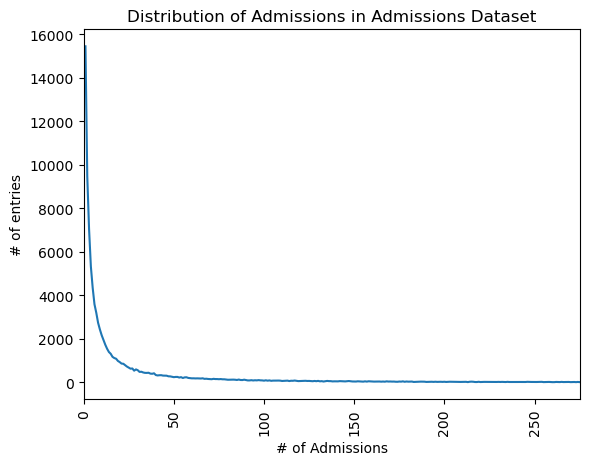

In [609]:
#get counts for 'Admissions' column and plot distribution
ag_counts = df['Admissions'].value_counts(sort=False).sort_index()
plt.plot(ag_counts)
plt.xlim(0, 275)
plt.xticks(rotation=90)
plt.title("Distribution of Admissions in Admissions Dataset")
plt.xlabel("# of Admissions")
plt.ylabel("# of entries")

Above graph shows the distribution of the number of admissions in the dataset. The data extends for up to 2861 admissions, but the graph is cut off at approximately two standard deviations plus the mean for clarity. There are about 16000 entries for 1 admission, and an exponential decrease from there, with 10 admissions having only about 15% the number of entries.

In [612]:
#takes df input and prints chart that shows the sum of 'Admissions' for that year
def annualAdmissions(df):
    aa_df = df.groupby('Year')['Admissions'].sum()
    max_x = aa_df.idxmax()
    max_y = aa_df.max()
    plt.plot(aa_df)
    plt.title("Total Number of Admissions per Year")
    plt.xlabel("year")
    plt.ylabel("# of admissions")
    plt.annotate(('max: ' + str(max_x)), xy=(max_x, max_y), xytext=(max_x, max_y + 0.2))

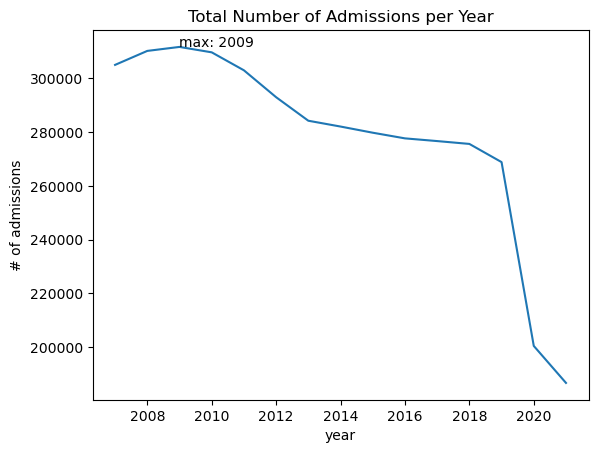

In [613]:
#call annualAdmissions on df and display chart
annualAdmissions(df)

Admissions start at about 300000 in 2007 and peak in 2009, with a gradual drop-off to about 280000 in 2014. From there, there is a steady decrease to about 265000 in 2019, and a steep drop below 200000 in 2021, though the latter can probably by attributed to the Covid-19 Pandemic allowing less people to seek out treatment. Even otherwise, the amount of admissions shows a steady decrease over the sample.

In [616]:
#takes df and year inputs and returns chart of the proportion of 'Admissions' from a given county for the 10 counties with the highest proportions
def annualAdmissionsByCounty(df, year):
    year_df = df.loc[df['Year']==year]
    year_sum = year_df['Admissions'].sum()
    props = year_df.groupby('County of Program Location')['Admissions'].sum()
    props = (props/year_sum).sort_values(ascending=False).head(10)

    plt.bar(props.index, props.values)
    plt.title(("Annual Admissions by County in " + str(year) + " (Top 10)"))
    plt.xlabel("county")
    plt.ylabel("proportion of year's admissions")
    plt.xticks(rotation=90)
    plt.show()

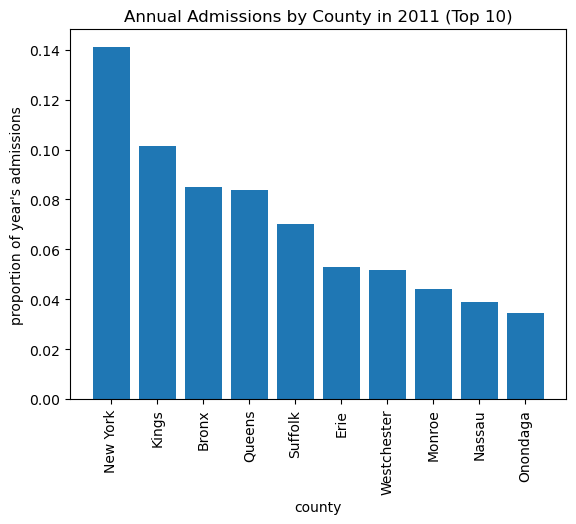

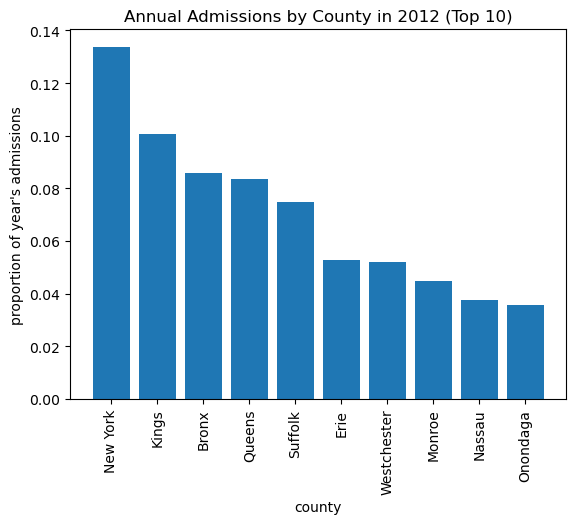

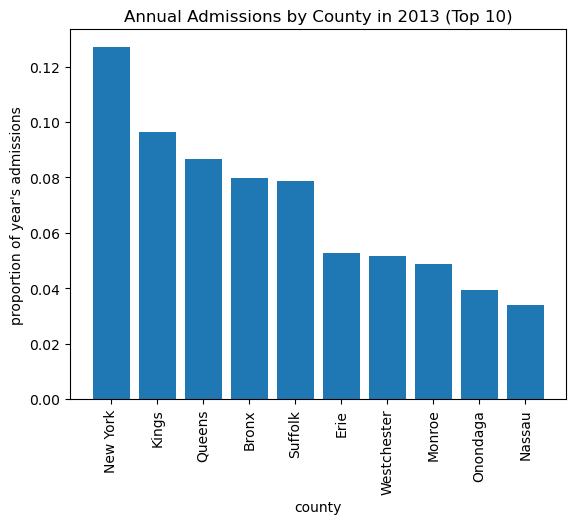

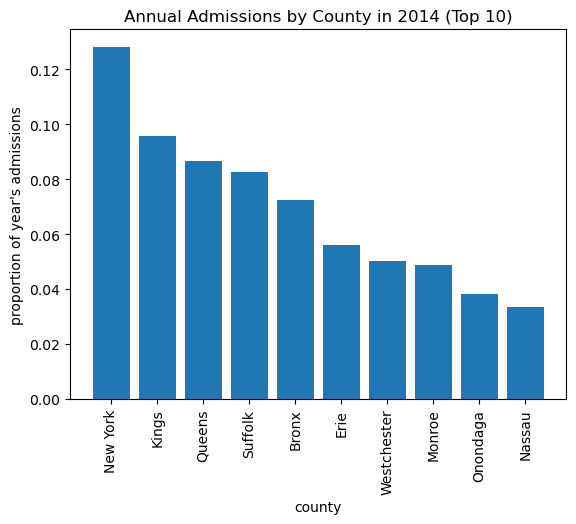

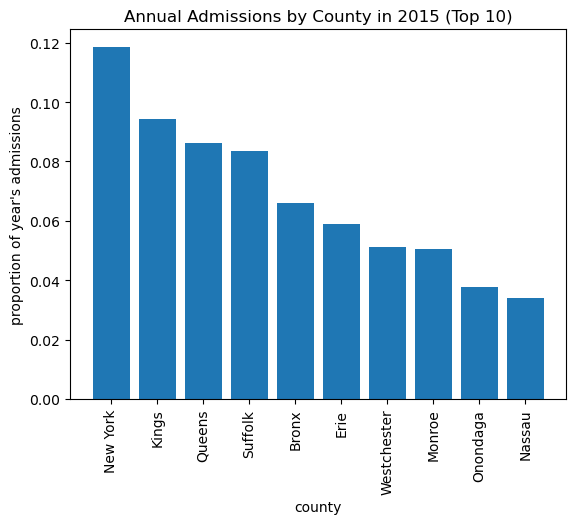

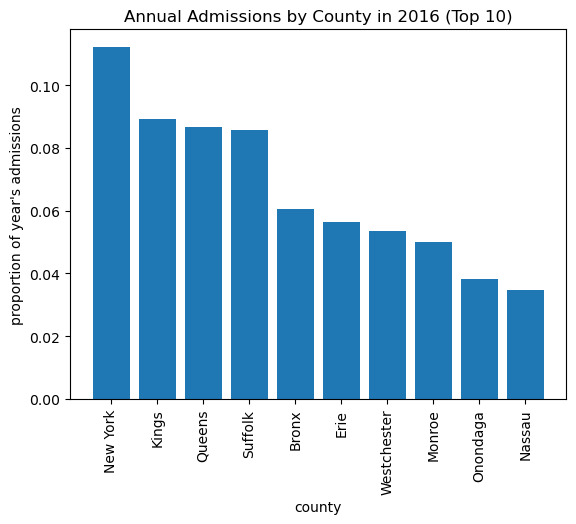

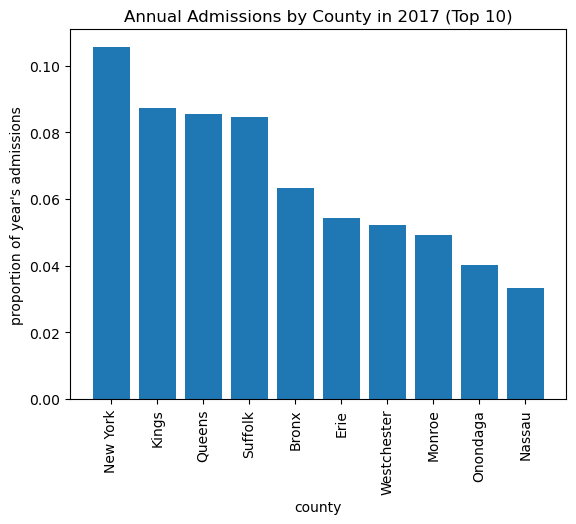

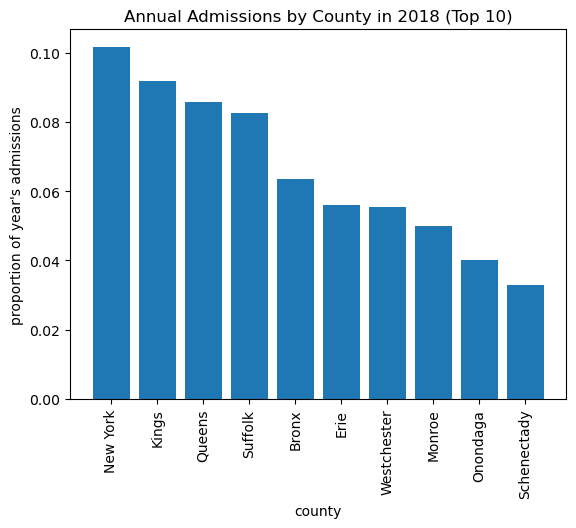

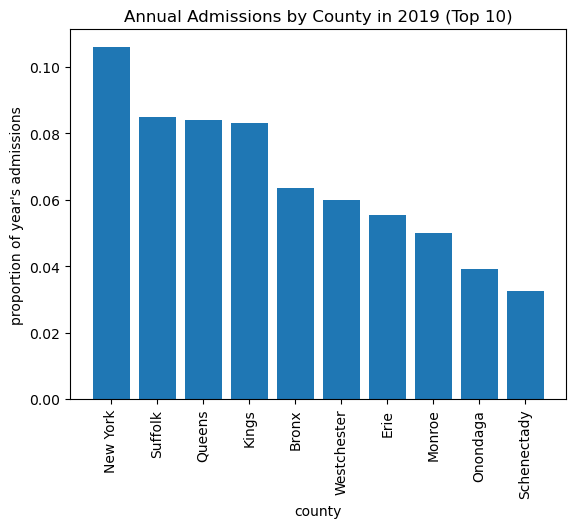

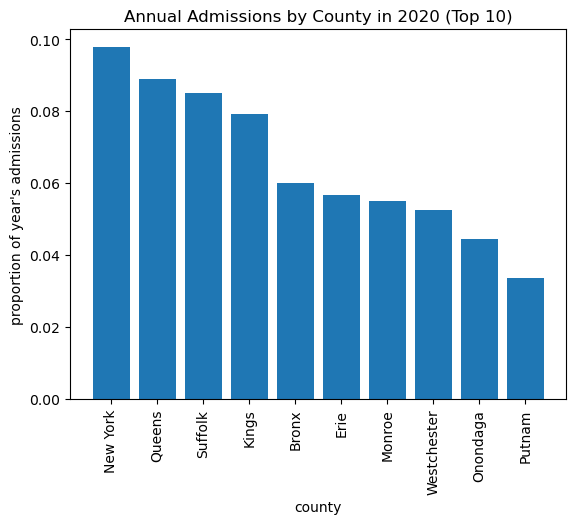

In [617]:
for year in range(2011, 2021):
    annualAdmissionsByCounty(df, year)

Throughut the decade, the relative distribution of admissions between the counties stays releatively similar, with New York having the most number of admissions at about 14% of the sample, and Onondaga having the least at around 3.5% percent of the sample, though it seems like the admissions have not been adjusted for county population. There seems to be a slight deccrease in admissions over the course of the decade, more prominently in the counties near New York, though it is unclear whether that decrease is statistically significant.

In [620]:
#extract admission for rehab
r_filter = df['Service Type'].str.contains('Rehab|Rehabilitation|rehab|rehabilitation', case=False, regex=True, na=False)
r_data = df[r_filter]

In [621]:
#group data by 'Age Group' and 'Primary Substance Group' and find most used substances
grouped = r_data.groupby(['Age Group', 'Primary Substance Group'])['Admissions'].sum().reset_index()
substances = grouped.loc[grouped.groupby('Age Group')['Admissions'].idxmax()]
substances

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '18 through 24'),
  Text(1, 0, '25 through 34'),
  Text(2, 0, '35 through 44'),
  Text(3, 0, '45 through 54'),
  Text(4, 0, '55 and Older'),
  Text(5, 0, 'Under 18')])

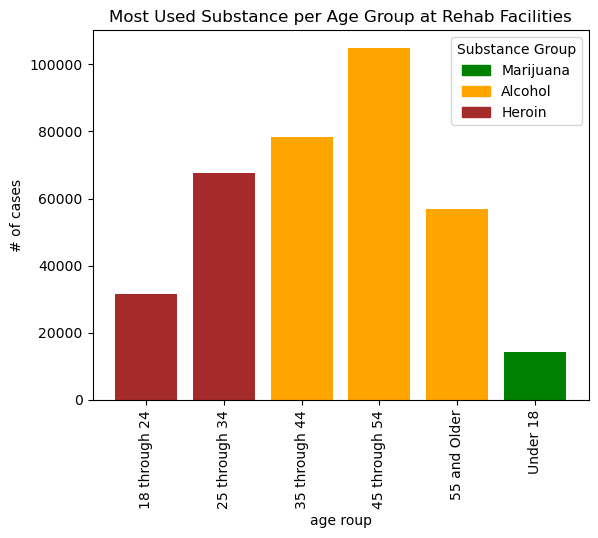

In [622]:
#visualize the substance data
color_map = {'Marijuana': 'green', 'Alcohol': 'orange', 'Heroin': 'brown'}
colors = substances['Primary Substance Group'].map(color_map)
bars = plt.bar(substances['Age Group'], substances['Admissions'], color=colors)
plt.title('Most Used Substance per Age Group at Rehab Facilities')
plt.xlabel('age roup')
plt.ylabel('# of cases')
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[substance]) for substance in color_map]
plt.legend(handles, color_map.keys(), title="Substance Group")
plt.xticks(rotation=90)

In [623]:
#identify most prominent substance per age group
print(substances)

        Age Group Primary Substance Group  Admissions
3   18 through 24                  Heroin       31583
9   25 through 34                  Heroin       67720
12  35 through 44                 Alcohol       78199
18  45 through 54                 Alcohol      104903
24   55 and Older                 Alcohol       56801
34       Under 18               Marijuana       14118


The usage of the most used substance for any age group peaks with alcohol for the 45-54 demographic (100000 admissions), with the second highest and fourth highest also being alcohol for the 35-44 and 55+ demographics respectively (60000-70000 admissions). Third with a similr amount of admissions was the 25-34 demographic with heroin, while the 18-24 and under 18 demographics had less than 20000 admissions for heroin and marijuana respectively.

In [626]:
#filter for selected counties and find sums for county by substance
selected_counties = ['New York', 'Queens', 'Suffolk', 'Bronx', 'Kings']
filtered = r_data[r_data['County of Program Location'].isin(selected_counties)]
grouped = filtered.groupby(['County of Program Location', 'Primary Substance Group'])['Admissions'].sum().unstack(fill_value=0)

In [627]:
#get unique substances from rehab data
substance_groups = r_data['Primary Substance Group'].unique()
for substance in substance_groups:
    if substance not in grouped.columns:
        grouped[substance] = 0
grouped = grouped[substance_groups]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'New York'),
  Text(1, 0, 'Queens'),
  Text(2, 0, 'Suffolk'),
  Text(3, 0, 'Bronx'),
  Text(4, 0, 'Kings')])

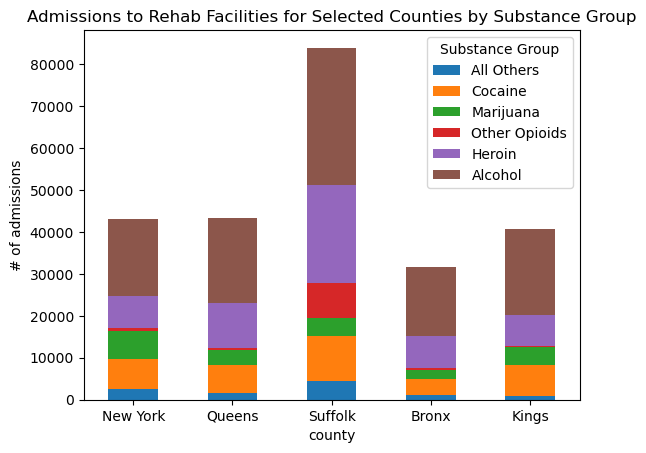

In [656]:
#visualize the data for the selected counties
grouped.loc[selected_counties].plot(kind='bar', stacked=True)
plt.title('Admissions to Rehab Facilities for Selected Counties by Substance Group')
plt.xlabel('county')
plt.ylabel('# of admissions')
plt.legend(title='Substance Group')
plt.xticks(rotation=0)

Accross the five counties examined, alcohol is the most commonly used substance by admissions, accouting for about 35-50% of the samples. The second most common is heroin, accouning for about 20% of the samples, except in Suffolk county, where its closer to 30%. The remaining substances are similarly istrubuted between the sample as cocaine, marijuana, others, and other opioids in decreasing order. One notable exception is again Suffolk county, where other opioids account for about 10% of the sample, drastically higher than the other counties surveyed.

In [658]:
#group data by 'Age Group' and 'Program Category' and find most used substances
grouped = df.groupby(['Age Group', 'Program Category'])['Admissions'].sum().reset_index()
programs = grouped.loc[grouped.groupby('Age Group')['Admissions'].idxmax()]
programs

,Age Group,Program Category,Admissions
3,18 through 24,Outpatient,325602
9,25 through 34,Outpatient,546854
15,35 through 44,Outpatient,408263
18,45 through 54,Crisis,359747
24,55 and Older,Crisis,170889
33,Under 18,Outpatient,94845


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '18 through 24'),
  Text(1, 0, '25 through 34'),
  Text(2, 0, '35 through 44'),
  Text(3, 0, '45 through 54'),
  Text(4, 0, '55 and Older'),
  Text(5, 0, 'Under 18')])

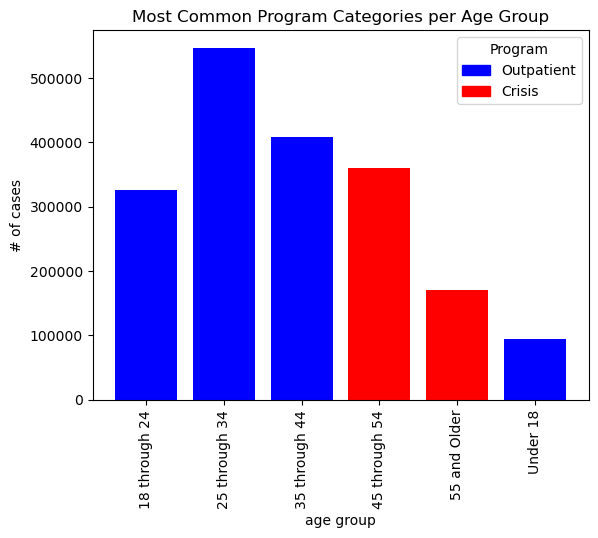

In [668]:
#visualize the program data
color_map = {'Outpatient': 'blue', 'Crisis': 'red'}
colors = programs['Program Category'].map(color_map)
bars = plt.bar(programs['Age Group'], programs['Admissions'], color=colors)
plt.title('Most Common Program Categories per Age Group')
plt.xlabel('age group')
plt.ylabel('# of cases')
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[programs]) for programs in color_map]
plt.legend(handles, color_map.keys(), title="Program")
plt.xticks(rotation=90)

Outpatient programs were the most common for the under 18, 18-24, 25-34, and 35-44 demographics, while the criis programs were the most common for the 45-55 and 55+ demographics. Though the earlier chart about the most common substances used per age demographic was isolated for rehab admissions, taking it into account when examining the above graph seems to be telling. The 45-55 and 55+ demographics accounted for a large portion of the sample for which alcohol was the most common substance used, and the overlap with these demographics as the only ones where the crisis programs were the most common is likely not a coincedence, although further investigation would be necessary before drawing any conclusions.